# Phase 4 Project Submission¶
- Student name: Lucas Wilkerson
- Student pace: Flex/part time
- Scheduled project review date/time:
- Instructor name: Morgan Jones

# Pneumonia Detection and Classification

## Business Problem and Stakeholder

A healthcare physician group is looking to improve their patient outcomes, specifically patients who are being diagnosed with pneumonia. Pneumonia is a significant health concern among patients, especially geriatric and pediatric patients. For effective treatment and the best possible outcomes, early detection and diagnosis is crucial so that treatment can be initiated as soon as possible. Current methods for diagnosing pneumonia can be time-consuming and can be prone to error. Through the development and use of method such as image classification and deep learning, we may be able to improve this process which can lead to an increase in early accurate identification and as a result improve patient outcomes.



## Data Understanding 

For this project, the aim is to build a convolution neural network (CNN)  model for image classification that can classify whether a patient has pneumonia when provided a chest x-ray image. A Kaggle dataset containing 5856 chest x-ray images was utilized to construct this model. The chest X-ray images were from pediatric patients with or without pneumonia who are ages one to five and were split into 3 separate datasets: 

- Train (5216 images): data used for training the model
- Test (624 images): data used for testing and evaluating the model's performance 
- Validation (16 images): data used during the training process to help tune the model

## Data Preparation 

Before building the model, the data underwent several preprocessing steps including:
- Data distribution analysis to understand the class balance or imbalance
- Visualizing sample images to get a visual sense of the data
- Checking the image dimensions to ensure they were suitable for the model.

During data preparation and preprocessing: 
- ImageDataGenerator from Keras was used for data augmentation to increase class diversity
- All images were rescaled and normalized to the range [0,1]
- Class imbalance was accounted for by balancing class weights

The data was also subsampled for the modeling process to allow for shorter computation run times. Twenty percent of the data was used for training. 


## Modeling

### Model 1: 
A Baseline Convolutional Neural Network (CNN) model was constructed for the image classification. The basic architecture comprises convolutional layers with increasing filters, followed by max-pooling layers to capture features. Flattened outputs are fed through dense layers. The model is compiled with binary cross-entropy loss and trained for ten epochs using training and validation data, enabling it to learn and enhance its classification capabilities over time. The main metrics used to evaluate model performance included accuracy and recall. The baseline model had a test accuracy of 0.8365 and test recall of 0.8365 with a train accuracy of 0.8984 and train recall of 0.8684. Performance was decent for the baseline but further parameters were tuned to increase model complexity to capture more patterns with the desire to improve performance. 

- Test Loss: 0.4282
- Test Accuracy: 0.8365
- Test Recall: 0.8359
- Train Loss: 0.2443
- Train Accuracy: 0.8984
- Train Recall: 0.8684

### Model 2:
Model 2 followed a similar architecture with the only changes being to increase the number of filters in the convolutional layers and adjusting the learning rate to 0.001. Model 2 had a test accuracy of 0.8029 and test recall of 0.9205 with a train accuracy of 0.9329 and train recall of 0.9381. Performance with test recall, train recall, and train accuracy were all improved however test accuracy decreased slightly. The model does indicate that it is overfitting which could be improved with further regularization techniques. 

- Test Loss: 0.4841
- Test Accuracy: 0.8029
- Test Recall: 0.9205
- Train Loss: 0.1956
- Train Accuracy: 0.9329
- Train Recall: 0.9381

### Model 3:
Model 3 followed a similar architecture to Model 2 with the only new adjustment being the addition of L2 regularizers of 0.1 being added to the dense layers. Model 3 had a test accuracy of 0.8333 and test recall of 0.8308 with a train accuracy of 0.9128 and train recall of 0.8955. Performance with test recall, train recall, and train accuracy all decreased slightly however test accuracy increased slightly. The model does indicate that it is overfitting which could be improved with further regularization techniques. 

- Test Loss: 0.6956539750099182
- Test Accuracy: 0.8333333134651184
- Test Recall: 0.8307692408561707
- Train Loss: 0.46221601963043213
- Train Accuracy: 0.9127516746520996
- Train Recall: 0.8954838514328003

### Model 4: 
Model 4 followed a similar architecture to Model 3 with the only new adjustment being an increase in epochs from 10 to 20. Model 4 had a test accuracy of 0.8091 and test recall of 0.9282 with a train accuracy of 0.9108 and train recall of 0.9510. Performance with test recall, train recall, and train accuracy all increased from the previous model  however test accuracy decreased slightly. 

- Test Loss: 0.6922
- Test Accuracy: 0.8093
- Test Recall: 0.9282
- Train Loss: 0.4452
- Train Accuracy: 0.9108
- Train Recall: 0.9510

## Evaluation

Model 4 seemed to be the best performing model, just slightly over the baseline model. While test accuracy was slightly lower than baseline (0.8091 vs 0.8365), test recall was higher (0.9282 vs 0.8365). Model 4 is the ideal model to choose here because it performs better at correctly classifying images with pneumonia. While this model is higher with recall and correctly identifying those with pneumonia, there is the chance for more false positive results (individuals being classified as having pneumonia who in fact do not). This is more ideal because we would rather correctly identify positive cases than to not identify someone with pneumonia and they get left untreated. 

Variations in test results from the models can be attributed to differences in model architectures and regularization techniques. Careful consideration of these factors and potential hyperparameter tuning can lead to improved model performance.


## Data Preparation/ Preprocessing

To start the preparation and preprocessing phase, the necessary packages will be imported for this project. Next a directory path will be made to each of the three dataset groups: training data, test data, validation data. The images will be loaded.

In [1]:
#importing necessary packages

from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from sklearn.utils import class_weight , compute_class_weight
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
from keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Activation
from keras import optimizers 
from keras.optimizers import Adam , SGD, RMSprop
from keras.metrics import Accuracy, Recall
from keras.utils import array_to_img, img_to_array, load_img
from keras import regularizers
from keras.regularizers import l1 , l2 
from keras.callbacks import EarlyStopping
import os

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
os.environ['KMP_DUPLICATE_LIB_OK']='True' # This prevents kernel shut down due to xgboost conflict
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # This line prevents tf's comments about the optimizing your machine


In [2]:
# Creating directory path for loading datasets
train_dir = 'chest_xray/train/'
test_dir = 'chest_xray/test/'
val_dir = 'chest_xray/val/'

In [3]:
# Performing data augmentmentation to increase data diversity and possibly mitigate some effects of class imbalance
# All images will be rescaled by 1./255


# Set the seed for reproducibility
np.random.seed(42)


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# Getting all training data (5216 images) 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size=5216, 
        class_mode='binary')

# Getting all the test data (624 images)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        batch_size=624,
        class_mode='binary')


# Getting all the validation data (16 images)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        batch_size=16, 
        class_mode='binary')

# Creating the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


The images were loaded from each directory. Train, test and validation images and label sets were generated using ImageDataGenerato. Data augmentation was applied to the training set to increase diversity and all sets were rescaled and normalized to a [0,1] scale. 

In [4]:
# Function to get class counts
def get_class_counts(labels):
    unique_classes, class_counts = np.unique(labels, return_counts=True)
    class_counts_dict = dict(zip(unique_classes, class_counts))
    return class_counts_dict

# Get class counts for each dataset
train_class_counts = get_class_counts(train_labels)
test_class_counts = get_class_counts(test_labels)
val_class_counts = get_class_counts(val_labels)

# Print class counts
print("Train Class Counts:", train_class_counts)
print("Test Class Counts:", test_class_counts)
print("Validation Class Counts:", val_class_counts)

# Viewing class indices
train_generator.class_indices

Train Class Counts: {0.0: 1341, 1.0: 3875}
Test Class Counts: {0.0: 234, 1.0: 390}
Validation Class Counts: {0.0: 8, 1.0: 8}


{'NORMAL': 0, 'PNEUMONIA': 1}

## Data Analysis/ Data Visualization

In [5]:
# Previewing shape of each dataset

print("Image Dataset Shape")
print("Train:", train_images.shape)
print("Test:", test_images.shape)
print("Validation:", val_images.shape)

print("Label Dataset Shape")
print("Train:", train_labels.shape)
print("Test:", test_labels.shape)
print("Validation:", val_labels.shape)

# Viewing class indices
train_generator.class_indices

Image Dataset Shape
Train: (5216, 256, 256, 3)
Test: (624, 256, 256, 3)
Validation: (16, 256, 256, 3)
Label Dataset Shape
Train: (5216,)
Test: (624,)
Validation: (16,)


{'NORMAL': 0, 'PNEUMONIA': 1}

### Class Distribution

A function was created to visualize the class counts for each set. 

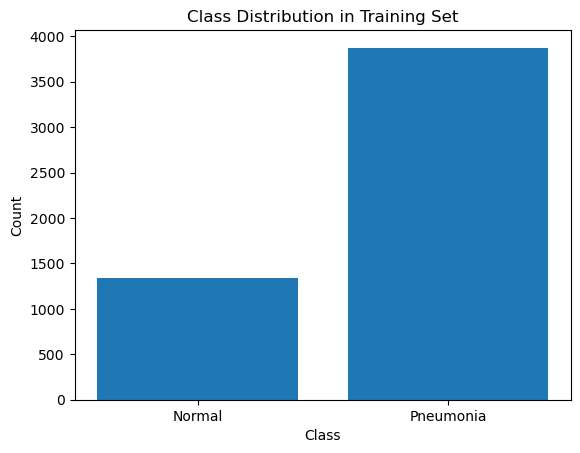

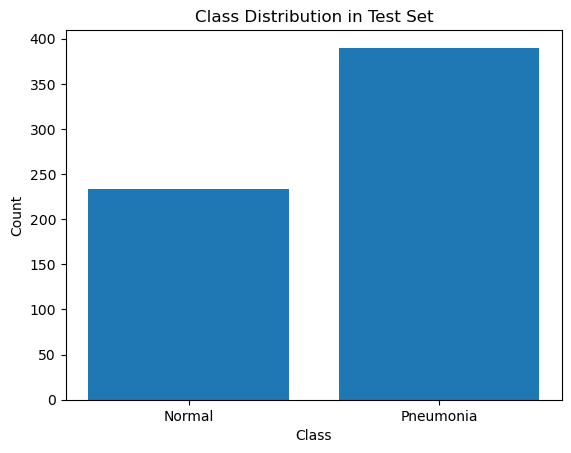

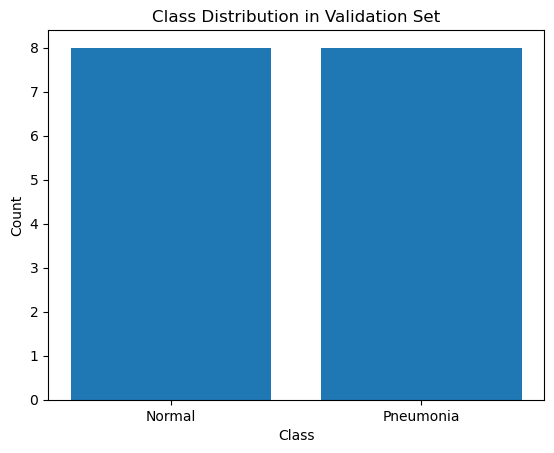

In [6]:
# Get class counts for each set
train_class_counts = np.unique(train_labels, return_counts=True)
test_class_counts = np.unique(test_labels, return_counts=True)
val_class_counts = np.unique(val_labels, return_counts=True)

# Define class labels
class_labels = {0: 'Normal', 1: 'Pneumonia'}

# Plot class distribution
def plot_class_distribution(class_counts, dataset):
    classes, counts = class_counts
    plt.bar(classes, counts)
    plt.title(f'Class Distribution in {dataset} Set')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(list(class_labels.keys()), [class_labels[c] for c in classes])  # Set x-axis ticks with labels
    plt.show()

# Plot for training set
plot_class_distribution(train_class_counts, 'Training')

# Plot for test set
plot_class_distribution(test_class_counts, 'Test')

# Plot for validation set
plot_class_distribution(val_class_counts, 'Validation')

Looking at the characteristics of the datasets, we can derive the total number of images per group, along with the size of each image, and the class indices for labeling. Images labeled with a 0 are classified as Normal while images labeled with a 1 are classified as having Pneumonia. From the visualized plots, we can the distribution between individuals with pneumonia and those without. It can be seen that there is a class imbalance with the training set which will be addressed by balancing class weights.

Training set: 5216 images 
- Pneumonia: 3875
- Normal: 1341

Test set: 624 images 
- Pneumonia: 390
- Normal: 234

Validation set: 16 images
- Pneumonia: 8
- Normal: 8

Image size: 256 x 256 x 3

Looking at the whole dataset, there is a total of 5856 images.

- The training set has 3875 images labeled with pneumonia while having 1341 labeled as normal/without pneumonia. This image set seems to have an imbalanced class distribution since there are a long more images with pneumonia. This class imbalance could affect the model's performance and ability to generalize over the data. This class imbalance will be addressed. 


- The test set has 390 images labeled with pneumonia while having 234 labeled as normal/without pneumonia. This image appears to have a more balanced distribution in comparison to the training set. Even though the the pneumonia images count is still higher than the images without pneumonia, the difference is not as vast as the training set.

  
- The validation set has small number of images for both classes with 8 images labeled with pneumonia while having 8 labeled as normal/without pneumonia.



### Previewing Sample Images 

In [7]:
# Previewing sample array of the labels
train_labels[:20]

array([1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1.], dtype=float32)

0.0


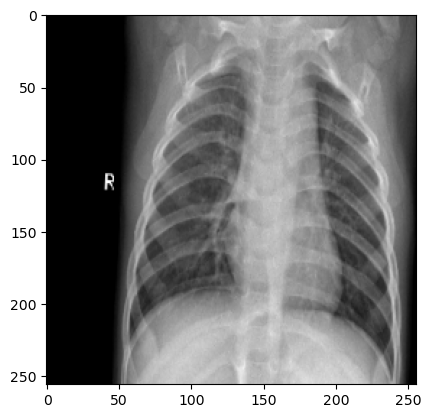

In [8]:
# Previewing sample image from training set
example_img = train_images[8]
plt.imshow(example_img)
print(train_labels[8])

From the image above, we can see this an example of a individual without pneumonia. 

1.0


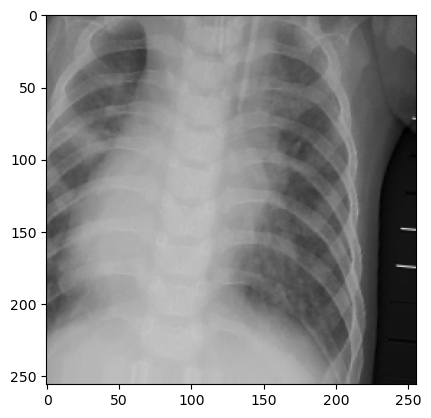

In [9]:
# Previewing sample image from training set
example_img_pne = train_images[2]
plt.imshow(example_img_pne)
print(train_labels[2])

From the image above, we can see this an example of a individual with pneumonia. 

## Data Modeling
### Building a Convolutional Neural Network Model

For pneumonia classficiation I will be building a convolutional neural network (CNN) model. I'll start with a baseline simple CNN and then based on the results, I plan to adjust and iterate as needed to find the optimal best performing model. First I plan to test these models on a smaller subset of the training data for speed of runtimes. After the best model is determined, the whole dataset will be utilized. 

Metrics I will be looking at for evaluation will include accuracy and recall of the model. 

In [10]:
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
np.random.seed(42)

# Define the percentage of the original training set to use
percentage_to_use = 0.2 

# Split the original training set into a smaller subset
sample_train_images, _, sample_train_labels, _ = train_test_split(
    train_images, train_labels, 
    train_size=percentage_to_use, 
    stratify=train_labels,  # Maintain class distribution
    random_state=42   # Set random seed for reproducibility
)

# Print the shape of the new subset
print("Sample Train Images Shape:", sample_train_images.shape)
print("Sample Train Labels Shape:", sample_train_labels.shape)


Sample Train Images Shape: (1043, 256, 256, 3)
Sample Train Labels Shape: (1043,)


In [11]:
# Define a function to plot training and validation curves
def plot_curves(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Define a function to get evaluation metrics
def get_evaluation_metrics(model):

    # Evaluate the model 
    test_evaluation_results = model.evaluate(test_images, test_labels)
    train_evaluation_results = model.evaluate(sample_train_images, sample_train_labels)

    # Print all evaluation results
    print("Test Evaluation Results:", test_evaluation_results)
    print("Train Evaluation Results:", train_evaluation_results)

    # Access specific values
    test_loss = test_evaluation_results[0]
    test_acc = test_evaluation_results[1]
    test_recall = test_evaluation_results[2]
    train_loss = train_evaluation_results[0]
    train_acc = train_evaluation_results[1]
    train_recall = train_evaluation_results[2]


    # Print specific values
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)
    print("Test Recall:", test_recall)
    print("Train Loss:", train_loss)
    print("Train Accuracy:", train_acc)
    print("Train Recall:", train_recall)

### Baseline Model 

Starting with the baseline CNN model, there will be three convalutional layers and two pooling layers. The model will be flattened and then ran through two dense layers. Binary crossentropy will utilized for loss. Class weights will be balanced.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 flatten (Flatten)           (None, 57600)             0

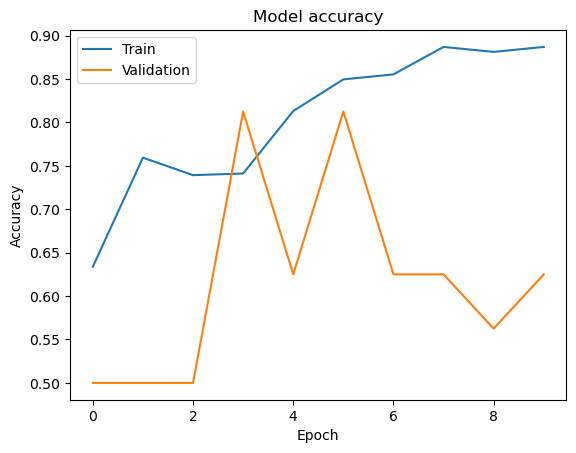

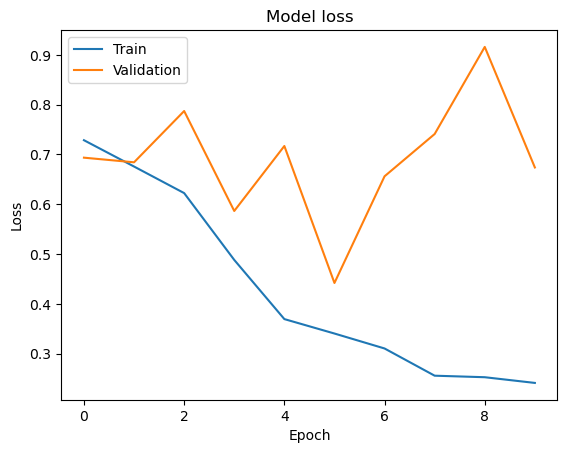

In [12]:
# cnn baseline model

# Set the seed for reproducibility
np.random.seed(42)

cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(filters= 8, 
                        kernel_size=(3,3), 
                        activation='relu', 
                        input_shape=(256, 256, 3)))
cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(layers.Conv2D(16, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(16, (3, 3), activation='relu'))

# Adding dense layers on top

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(16, activation='relu'))
cnn_model.add(layers.Dense(1, activation='sigmoid'))

# Compiling model with following parameters
cnn_model.compile(optimizer='adam',
                loss='binary_crossentropy', 
                metrics=['accuracy', 'Recall'])

# Inspecting model summary
cnn_model.summary()

# Balancing class weights to account for class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}


# Fit and train the model 
history = cnn_model.fit(sample_train_images, sample_train_labels,
                        epochs=10,
                        batch_size=128, 
                        class_weight=class_weights_dict, 
                        validation_data=(val_images, val_labels)   
                       )

# Evaluate the model 
get_evaluation_metrics(cnn_model)

# Viewing Results 
plot_curves(history)

Looking at the baseline CNN model:

- Test Loss: 0.4282
- Test Accuracy: 0.8365
- Test Recall: 0.8359
- Train Loss: 0.2443
- Train Accuracy: 0.8984
- Train Recall: 0.8684


Overall the baseline model performed well with accuracy and recall of both training and test sets over 80%.  The model performed slightly better in both recall and accuracy on the training set indicating slight overfitting. Will continue to iterate and adjust to work to improve performance. 

### Model 2 : CNN Learning Late (0.001) and Increased Filters

With the second model, I will be increasing the number of filters in the convolutional layers to introduce more complexity and adjust the learning rate to see if performance can be improved.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 115200)           

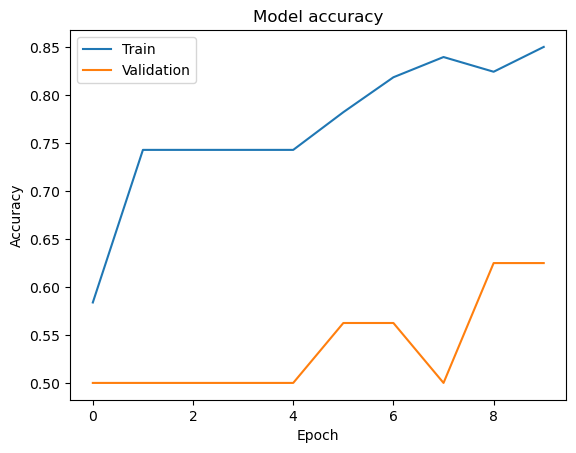

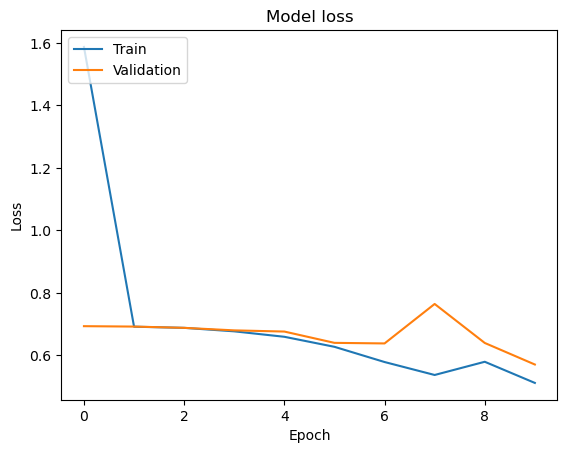

In [13]:
# CNN model 2
# Adjusted learning rate to 0.001 
# Increased filters in convalution layers

# Set the seed for reproducibility
np.random.seed(42)

cnn_model2 = models.Sequential()
cnn_model2.add(layers.Conv2D(filters= 16, 
                        kernel_size=(3,3), 
                        activation='relu', 
                        input_shape=(256, 256, 3)))
cnn_model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model2.add(layers.MaxPooling2D((2, 2)))
cnn_model2.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Adding dense layers on top

cnn_model2.add(layers.Flatten())
cnn_model2.add(layers.Dense(16, activation='relu'))
cnn_model2.add(layers.Dense(1, activation='sigmoid'))

# Compiling model with following parameters
optimizer = optimizers.Adam(learning_rate=0.001)
cnn_model2.compile(optimizer=optimizer,
                loss='binary_crossentropy', 
                metrics=['accuracy', 'Recall'])

# Inspecting model summary
cnn_model2.summary()

# Balancing class weights to account for class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}


# Fit and train the model 
history2 = cnn_model2.fit(sample_train_images, sample_train_labels,
                        epochs=10,
                        batch_size=128, 
                        class_weight=class_weights_dict, 
                        validation_data=(val_images, val_labels)   
                       )

# Evaluate the model 
get_evaluation_metrics(cnn_model2)

# Viewing Results 
plot_curves(history2)

Looking at CNN model 2 with the adjusted learning rate of 0.001 and increased filters:

- Test Loss: 0.4841
- Test Accuracy: 0.8029
- Test Recall: 0.9205
- Train Loss: 0.1956
- Train Accuracy: 0.9329
- Train Recall: 0.9381


With adjusting the learning rate to 0.001 and increased filters, overall model performance in test accuracy decreased slightly from baseline model. Train accuracy improved past baseline. Both train and test recall improved past baseline model. The model does indicate that it is overfitting which could be improved with further regularization techniques. 


### CNN Model 3: L2 Regularizar Added to Model 

L2 Regularization was added to the model to account for the slight overfitting.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 flatten_2 (Flatten)         (None, 115200)           

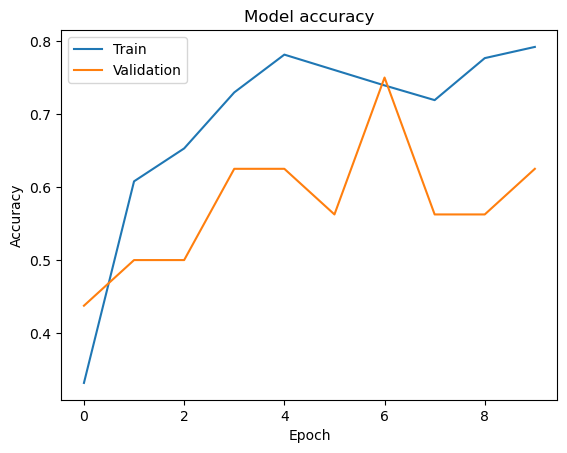

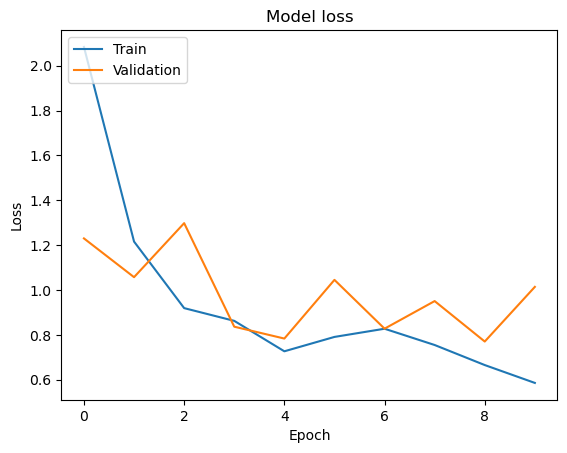

In [14]:
# CNN model  3
# Learning Rate 0.001
# Adding L2 regularization with strength of 0.1 to dense layers

# Set the seed for reproducibility
np.random.seed(42)

cnn_model3 = models.Sequential()
cnn_model3.add(layers.Conv2D(filters= 16, 
                        kernel_size=(3,3), 
                        activation='relu', 
                        input_shape=(256, 256, 3)))
cnn_model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model3.add(layers.MaxPooling2D((2, 2)))
cnn_model3.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Adding dense layers on top

cnn_model3.add(layers.Flatten())
cnn_model3.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
cnn_model3.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.1)))

# Compiling model with following parameters
optimizer = optimizers.Adam(learning_rate=0.001)
cnn_model3.compile(optimizer=optimizer,
                loss='binary_crossentropy', 
                metrics=['accuracy', 'Recall'])

# Inspecting model summary
cnn_model3.summary()

# Balancing class weights to account for class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}


# Fit and train the model 
history3 = cnn_model3.fit(sample_train_images, sample_train_labels,
                        epochs=10,
                        batch_size=128, 
                        class_weight=class_weights_dict, 
                        validation_data=(val_images, val_labels)   
                       )

# Evaluate the model 
get_evaluation_metrics(cnn_model3)

# Viewing Results 
plot_curves(history3)

Looking at this model's performance, test accuracy improved from Model 2 but just barely lower than baseline. Train recall, train accuracy and test recall all decreased from previous model. 

- Test Loss: 0.6957
- Test Accuracy: 0.8333
- Test Recall: 0.8308
- Train Loss: 0.4622
- Train Accuracy: 0.9128
- Train Recall: 0.8955

### CNN Model 4: Epochs Increased to 20

Model 4 will have the same architecture as Model 3 except with an increase to 20 epochs.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 flatten_6 (Flatten)         (None, 115200)           

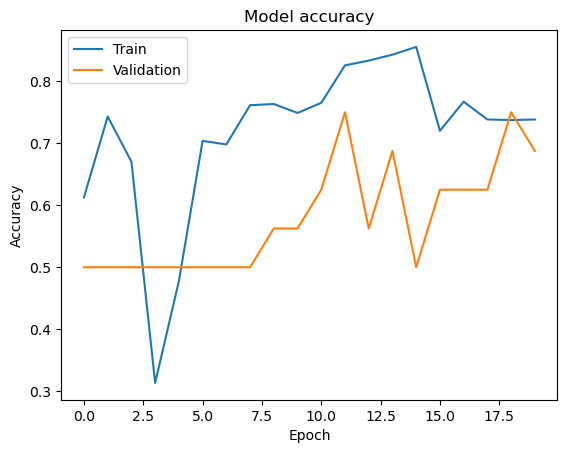

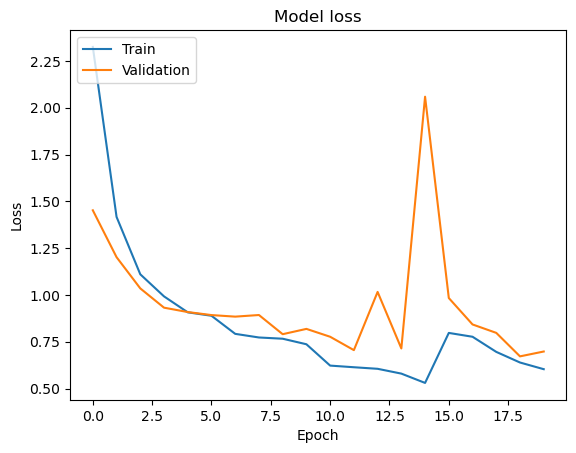

In [18]:
# CNN model 4 --> with 20 epochs 
# Learning rate to 0.001
# L2 regularization 0.1 

# Set the seed for reproducibility
np.random.seed(42)

cnn_model4 = models.Sequential()
cnn_model4.add(layers.Conv2D(filters= 16, 
                        kernel_size=(3,3), 
                        activation='relu', 
                        input_shape=(256, 256, 3)))
cnn_model4.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model4.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn_model4.add(layers.MaxPooling2D((2, 2)))
cnn_model4.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Adding dense layers on top

cnn_model4.add(layers.Flatten())
cnn_model4.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
cnn_model4.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.1)))

# Compiling model with following parameters
optimizer = optimizers.Adam(learning_rate=0.001)
cnn_model4.compile(optimizer=optimizer,
                loss='binary_crossentropy', 
                metrics=['accuracy', 'Recall'])

# Inspecting model summary
cnn_model4.summary()

# Balancing class weights to account for class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}


# Fit and train the model 
history4 = cnn_model4.fit(sample_train_images, sample_train_labels,
                        epochs=20,
                        batch_size=128, 
                        class_weight=class_weights_dict, 
                        validation_data=(val_images, val_labels)   
                       )

# Evaluate the model 
get_evaluation_metrics(cnn_model4)

# Viewing Results 
plot_curves(history4)

After increasing epochs to 20, model performance did improve in terms of test recall and train accuracy and train recall compared to model 3. Test accuracy was slightly lower. Train accuracy was higher than test accuracy leading to the model overfitting, however test recall and train recall were closer.

- Test Loss: 0.6922
- Test Accuracy: 0.8093
- Test Recall: 0.9282
- Train Loss: 0.4452
- Train Accuracy: 0.9108
- Train Recall: 0.9510

## Evaluation 

Model 4 seemed to be the best performing model, just slightly over the baseline model. While test accuracy was slightly lower than baseline (0.8091 vs 0.8365), test recall was higher (0.9282 vs 0.8365). 

Model 4 is the ideal model to choose here because it performs better at correctly classifying images with pneumonia. While this model is higher with recall and correctly identifying those with pneumonia, there is the chance for more false positive results (individuals being classified as having pneumonia who in fact do not). This is more ideal because we would rather correctly identify positive cases than to not identify someone with pneumonia and they get left untreated. 

Model 4:

- Test Loss: 0.6922
- Test Accuracy: 0.8093
- Test Recall: 0.9282
- Train Loss: 0.4452
- Train Accuracy: 0.9108
- Train Recall: 0.9510



## Conclusion and Recommendations 

- Healthcare providers should utilize this model as a tool for early pneumonia detection. While this model is not an official diagnostic tool for penuamonia, this model is useful for early detecton and screening. 

- Using this model, practitioner's can implement preventative health strategies to their patient population early on before disease progression and improve overall health outcomes. 

- In the context of identifying pneumonia. 

## Limitations and Future Considerations

While the model can be useful in the detection of pneumonia from chest x-ray images, the model is not perfect and does have it's limitations.

- False positives: When individuals actually have pneumonia, the model correctly identifies those indiviudals approximiately 84% of the time. With having a higher recall, there is an increased risk of incorrectly classifying indiviudals without pneumonia as having pneumonia. While there is this increased chance, having an increased risk of incorreclty identifying someone as having pneumonia is a better trade off in this situation that incorrectly labeling someone as not having pneumonia when they in fact do have pneumonia. If someone is labeled as a false positive, while it may be an inconvenience to that individual, this is better than the alternative becuase pneumonia is a serious condition that can be life threatening if left undetected and untreated. 

- Small sample size: With more data and more images to analyze, a more robust model could be utilized to increased accuracy.

- Run time/ Model complexity: As model complexity increases, this does increase the requirement for computation power and can increase model run times.



## Contact Information

- Email: ldwilker10@gmail.com

- GitHub: https://github.com/ldwilker10

- LinkedIn: https://www.linkedin.com/in/lucasdukewilkerson/